In [38]:
using Revise
using ITensors,ITensorMPS
using PastaQ
push!(LOAD_PATH,"../src/")
using RandomMeas
using ProgressBars

In [39]:
N  = 10
χ = 2^(N÷2)
ξ = siteinds("Qubit", N)
ψ = random_mps(ξ; linkdims=χ);

In [40]:
p = zeros(N)
for NA in 1:N
    spec = get_spectrum(ψ,NA)
    p[NA] = get_moment(spec,2)[1]
end
#Print purities
@show p;

p = [0.5015421346398085, 0.27533283347074694, 0.1648411947374082, 0.10062316641657001, 0.075402388000949, 0.08595799115233144, 0.13957013193377849, 0.2578602077135768, 0.5067755089564699, 0.9999999999999996]


In [42]:
#Perform Randomized measurements
nu=100
NM=100
data = zeros(Int8,(nu,NM,N))
datat = zeros(Int8,(NM,N))
for r in ProgressBar(1:nu, printing_delay=2)
    u = get_rotations(ξ,1) #Haar rotations in A
    get_RandomMeas!(datat,ψ,u)
    data[r,:,:] = datat
end

0.0%┣                                              ┫ 0/100 [00:00<00:00, -0s/it]
29.0%┣████████████▊                               ┫ 29/100 [00:02<00:05, 14it/s]
63.0%┣███████████████████████████▊                ┫ 63/100 [00:04<00:02, 15it/s]
93.0%┣█████████████████████████████████████████   ┫ 93/100 [00:06<00:00, 15it/s]
100.0%┣██████████████████████████████████████████┫ 100/100 [00:07<00:00, 15it/s]
100.0%┣██████████████████████████████████████████┫ 100/100 [00:07<00:00, 15it/s]


In [43]:
ps = zeros(N)
for NA in 1:N
        println(NA)
        ps[NA] = get_purity_hamming(data[:,:,1:NA],ξ[1:NA])
end
#print estimated purities
@show ps;

1
2
3
4
5
6
7
8
9
10
ps = [0.49989696969696923, 0.2757757575757577, 0.17650303030303033, 0.09174545454545457, 0.07705454545454545, 0.06684848484848478, 0.16122424242424227, 0.3638606060606059, 0.6047696969696967, 1.1651696969696959]


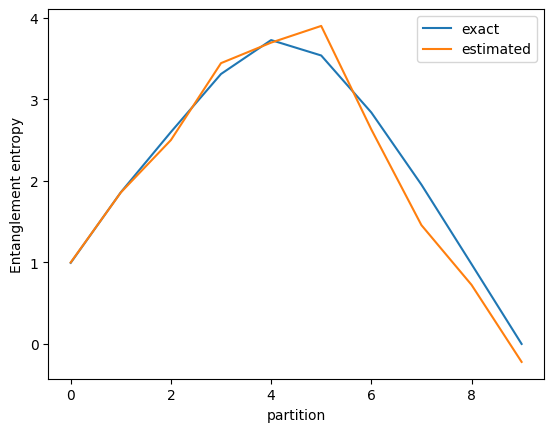

PyObject <matplotlib.legend.Legend object at 0x7f5cf54149d0>

In [44]:
using PyPlot
PyPlot.plot(-log2.(p),label="exact")
PyPlot.plot(-log2.(ps),label="estimated")
xlabel("partition")
ylabel("Entanglement entropy")
legend()